In [5]:
from keras.datasets import imdb
from keras import layers
from keras import models
import numpy as np


In [3]:
(train_data,train_label),(test_data,test_label)=imdb.load_data(num_words=10000)

17473536/17464789 [==============================] - 0s 0us/step


In [13]:
def vectroize(sequence,dimension=10000):
  results=np.zeros((len(sequence),10000))
  for i,sequence in enumerate(sequence):
    results[i,sequence]=1.
  return results
x_train=vectroize(train_data)
x_test=vectroize(test_data)

y_train = np.asarray(train_label).astype('float32')
y_test = np.asarray(test_label).astype('float32')

y_train

array([1., 0., 0., ..., 0., 1., 0.], dtype=float32)

In [7]:
model=models.Sequential()
model.add(layers.Dense(16,activation="relu"))

model.add(layers.Dense(16,activation="relu"))

model.add(layers.Dense(1,activation="sigmoid"))

In [10]:
word_index=imdb.get_word_index()
word_index


{'fawn': 34701,
 'tsukino': 52006,
 'nunnery': 52007,
 'sonja': 16816,
 'vani': 63951,
 'woods': 1408,
 'spiders': 16115,
 'hanging': 2345,
 'woody': 2289,
 'trawling': 52008,
 "hold's": 52009,
 'comically': 11307,
 'localized': 40830,
 'disobeying': 30568,
 "'royale": 52010,
 "harpo's": 40831,
 'canet': 52011,
 'aileen': 19313,
 'acurately': 52012,
 "diplomat's": 52013,
 'rickman': 25242,
 'arranged': 6746,
 'rumbustious': 52014,
 'familiarness': 52015,
 "spider'": 52016,
 'hahahah': 68804,
 "wood'": 52017,
 'transvestism': 40833,
 "hangin'": 34702,
 'bringing': 2338,
 'seamier': 40834,
 'wooded': 34703,
 'bravora': 52018,
 'grueling': 16817,
 'wooden': 1636,
 'wednesday': 16818,
 "'prix": 52019,
 'altagracia': 34704,
 'circuitry': 52020,
 'crotch': 11585,
 'busybody': 57766,
 "tart'n'tangy": 52021,
 'burgade': 14129,
 'thrace': 52023,
 "tom's": 11038,
 'snuggles': 52025,
 'francesco': 29114,
 'complainers': 52027,
 'templarios': 52125,
 '272': 40835,
 '273': 52028,
 'zaniacs': 52130,

In [14]:
model.compile(optimizer="rmsprop",loss="binary_crossentropy",metrics=["accuracy"])

In [15]:
x_val=x_train[:10000]
partial_train_x=x_train[10000:]
y_val=y_train[:10000]
partial_train_y=y_train[10000:]

In [18]:
model.fit(partial_train_x,partial_train_y,epochs=20,batch_size=512)

Epoch 1/20
30/30 [==============================] - 1s 42ms/step - loss: 1.6449e-05 - accuracy: 1.0000
Epoch 2/20
30/30 [==============================] - 1s 42ms/step - loss: 1.3746e-05 - accuracy: 1.0000
Epoch 3/20
30/30 [==============================] - 1s 42ms/step - loss: 0.0014 - accuracy: 0.9993
Epoch 4/20
30/30 [==============================] - 1s 41ms/step - loss: 9.5726e-06 - accuracy: 1.0000
Epoch 5/20
30/30 [==============================] - 1s 42ms/step - loss: 7.6977e-06 - accuracy: 1.0000
Epoch 6/20
30/30 [==============================] - 1s 42ms/step - loss: 6.7111e-06 - accuracy: 1.0000
Epoch 7/20
30/30 [==============================] - 1s 42ms/step - loss: 5.7934e-06 - accuracy: 1.0000
Epoch 8/20
30/30 [==============================] - 1s 42ms/step - loss: 0.0019 - accuracy: 0.9995
Epoch 9/20
30/30 [==============================] - 1s 42ms/step - loss: 1.7064e-05 - accuracy: 1.0000
Epoch 10/20
30/30 [==============================] - 1s 41ms/step - loss: 4.5420e

In [17]:
history=model.fit(partial_train_x,partial_train_y,epochs=20,batch_size=512,validation_data=(x_val,y_val))

Epoch 1/20
30/30 [==============================] - 2s 73ms/step - loss: 0.0058 - accuracy: 0.9989 - val_loss: 0.7431 - val_accuracy: 0.8663
Epoch 2/20
30/30 [==============================] - 2s 57ms/step - loss: 0.0022 - accuracy: 0.9999 - val_loss: 0.8006 - val_accuracy: 0.8643
Epoch 3/20
30/30 [==============================] - 4s 140ms/step - loss: 0.0040 - accuracy: 0.9993 - val_loss: 0.8145 - val_accuracy: 0.8640
Epoch 4/20
30/30 [==============================] - 2s 76ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.8506 - val_accuracy: 0.8644
Epoch 5/20
30/30 [==============================] - 2s 58ms/step - loss: 0.0041 - accuracy: 0.9991 - val_loss: 0.8834 - val_accuracy: 0.8621
Epoch 6/20
30/30 [==============================] - 2s 67ms/step - loss: 7.1548e-04 - accuracy: 1.0000 - val_loss: 0.9087 - val_accuracy: 0.8624
Epoch 7/20
30/30 [==============================] - 2s 66ms/step - loss: 0.0027 - accuracy: 0.9991 - val_loss: 0.9416 - val_accuracy: 0.8602
Epoch 8/

In [21]:
histroy_dict=history.history
histroy_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [30]:
from keras.metrics import accuracy
import matplotlib.pyplot as plt
loss=histroy_dict["loss"]
#acc=histroy_dict["accuracy"]
val_loss=histroy_dict["val_loss"]
print(loss)

[0.005817662924528122, 0.0021941980812698603, 0.00402017030864954, 0.0012108908267691731, 0.004120426718145609, 0.0007154786144383252, 0.0026555326767265797, 0.0004554261395242065, 0.00037321195122785866, 0.002558488864451647, 0.0001896887260954827, 0.00015333590272348374, 0.00012954144040122628, 0.002431798493489623, 7.338253635680303e-05, 5.728561882278882e-05, 4.7259505663532764e-05, 3.209464921383187e-05, 0.002131655579432845, 1.8620632545207627e-05]


In [33]:
epochs=range(1,len(acc)+1)

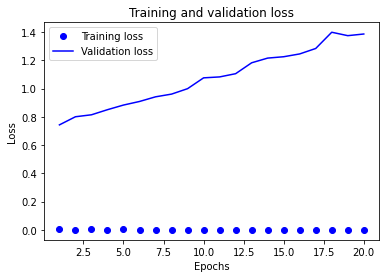

In [34]:
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')

plt.ylabel('Loss')
plt.legend()
